# Семинар 4. Основы работы с pandas

На этом занятии мы исследуем данные о морских портах России с помощью пакета pandas.

Данные загружены с портала открытых данных http://hubofdata.ru/dataset/esimo_ru_cniimf_27

In [49]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
ports = pd.read_excel('./datasets/ports_subset.xlsx') # характеристики портов
var_info = pd.read_excel('./datasets/ports_subset.xlsx', sheet_name=1) # описание переменных

Для начала, познакомимся с данными.

In [5]:
ports.head(5)

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation,MonthFirstIce,MonthStableIce,MonthIceMeltingStart,...,TrafficSeparationSystem,VesselTrackingManagementSystem,PassengerTerminalType,WaterArea,ShelteredStorageArea,UnshelteredStorageArea,PortArea,CapacityContainers,CapacityLiquidBulkTerminal,CapacityDryBulkTerminal
0,Выборг,Балтийское,Запад,60.708912,28.733285,"центр г. Выборг, побережье Выборгского залива",365,12.0,12.0,4.0,...,Н,Д,местный,2.87,3.70,39.80,16.66,6.0,70.0,1420.0
1,Высоцк,Балтийское,Запад,60.617813,28.563421,о. Высоцкий в Выборгском заливе,365,12.0,12.0,4.0,...,Д,Д,NaN,1.26,NaN,81.00,143.60,NaN,12500.0,4500.0
2,Калининград,Балтийское,Запад,54.702594,20.467366,устье р. Преголя в юго-восточной части Балтийс...,365,NaN,NaN,NaN,...,Д,Д,паромный,17.73,162.87,509.20,832.36,448.0,18320.0,16383.2
3,Приморск,Балтийское,Запад,60.335655,28.715618,юго-восточная часть пролива Бъёркезунд Финског...,365,12.0,12.0,4.0,...,Д,Д,NaN,31.36,NaN,NaN,246.85,NaN,108400.0,NaN
4,Большой порт Санкт-Петербург,Балтийское,Запад,59.895170,30.218395,острова дельты р. Невы в Невской губе в восточ...,365,11.0,12.0,3.0,...,Д,Д,круизный,628.90,153.62,2265.47,528.47,3010.2,17773.8,32425.8


Сводка по таблице данных показывает, что числа загрузились нормально, но в некоторых столбцах есть пропущенные значения (в таблице они отображаются как NaN - Not a Number)

In [6]:
ports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Port                            56 non-null     object 
 1   Sea                             56 non-null     object 
 2   Region                          56 non-null     object 
 3   Latitude                        56 non-null     float64
 4   Longitude                       56 non-null     float64
 5   Description                     56 non-null     object 
 6   DaysNavigation                  56 non-null     int64  
 7   MonthFirstIce                   44 non-null     float64
 8   MonthStableIce                  44 non-null     float64
 9   MonthIceMeltingStart            44 non-null     float64
 10  MonthClearWater                 44 non-null     float64
 11  OilTerminal                     56 non-null     object 
 12  OperatorShortName               56 non

Для справки можем использовать вспомогательную таблицу с расшифровкой названий столбцов

In [7]:
var_info

,Column,Description
0,Port,Наименование порта
1,Sea,Акватория порта
2,Region,Регион порта (укрупненный геообъект)
3,Latitude,"Широта точки (град., дес.доли град)"
4,Longitude,"Долгота точки (град., дес.доли град)"
5,Description,Описание
6,DaysNavigation,Продолжительность навигации в днях
7,MonthFirstIce,Первое появление льда
8,MonthStableIce,Устойчивое ледообразование
9,MonthIceMeltingStart,Начало таяния


## Задача 1. Выборка столбцов

1.1. Выведите таблицу с тремя столбцами: порт, акватория порта, площадь территории, пропускная способность контейнерных терминалов.

In [8]:
ports[['Port', 'Sea', 'PortArea', 'CapacityContainers']]

,Port,Sea,PortArea,CapacityContainers
0,Выборг,Балтийское,16.66,6.0
1,Высоцк,Балтийское,143.60,NaN
2,Калининград,Балтийское,832.36,448.0
3,Приморск,Балтийское,246.85,NaN
4,Большой порт Санкт-Петербург,Балтийское,528.47,3010.2
5,Пассажирский порт Санкт-Петербург,Балтийское,33.03,NaN
6,Усть-Луга,Балтийское,1045.91,NaN
7,Архангельск,Белое,212.27,75.0
8,Певек,Восточно-Сибирское,19.00,15.0
9,Онега,Белое,2.68,NaN


1.2. Выведите таблицу со всеми столбцами начиная от Port до DaysNavigation

In [9]:
ports.iloc[:, 0:7]

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation
0,Выборг,Балтийское,Запад,60.708912,28.733285,"центр г. Выборг, побережье Выборгского залива",365
1,Высоцк,Балтийское,Запад,60.617813,28.563421,о. Высоцкий в Выборгском заливе,365
2,Калининград,Балтийское,Запад,54.702594,20.467366,устье р. Преголя в юго-восточной части Балтийс...,365
3,Приморск,Балтийское,Запад,60.335655,28.715618,юго-восточная часть пролива Бъёркезунд Финског...,365
4,Большой порт Санкт-Петербург,Балтийское,Запад,59.895170,30.218395,острова дельты р. Невы в Невской губе в восточ...,365
5,Пассажирский порт Санкт-Петербург,Балтийское,Запад,59.950931,30.195580,"Невская губа Финского залива Балтийского моря,...",365
6,Усть-Луга,Балтийское,Запад,59.684950,28.426347,восточное и южное побережье Лужской губы Финск...,365
7,Архангельск,Белое,Арктика,64.528941,40.539525,устье р. Северная Двина,365
8,Певек,Восточно-Сибирское,Арктика,69.704154,170.256541,Чаунская губа Восточно-Сибирского моря,120
9,Онега,Белое,Арктика,63.903055,38.095320,"3 мили выше устья р. Онега, впадающей в Онежск...",365


1.3. Выведите таблицу со столбцами от Port до DaysNavigation, включающие записи с 10 по 19.

In [10]:
ports.iloc[10:20, 0:7]

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation
10,Нарьян-Мар,Баренцево,Арктика,67.647310,52.998083,"70 миль от устья р. Печора, впадающей в Печорс...",150
11,Варандей,Баренцево,Арктика,68.848655,58.243434,побережье Баренцева моря в районе Варандейской...,365
12,Витино,Белое,Арктика,67.079438,32.321429,западный берег Кандалакшского залива Белого моря,365
13,Мурманск,Баренцево,Арктика,68.978155,33.064089,"Кольский полуостров, побережье Баренцева моря",365
14,Дудинка,Карское,Арктика,69.408222,86.157587,правый берег р. Енисей в 230 милях от ее устья...,365
15,Кандалакша,Белое,Арктика,67.137266,32.408883,"Кандалакшский залив, северо-западная часть Бел...",365
16,Астрахань,Каспийское,Юг,46.385538,48.023436,"устье р. Волга, верхняя часть ее дельты",365
17,Оля,Каспийское,Юг,45.783430,47.549565,"дельта р. Волга, 67 км. Волго-Каспийского канала",365
18,Новороссийск,Черное,Юг,44.734866,37.793588,"северо-восток Черного моря, Новороссийская (Це...",365
19,Анапа,Черное,Юг,44.898251,37.305654,северо-восточное побережье Черного моря,365


## Задача 2. Фильтрация данных по условию

2.1. Выведите таблицу с названиями и координатами портов на Балтике. Данные можно отобрать по столбцу Акватория порта (Sea).

Подсказка: Посмотреть, какие названия акватории используются в данных, удобно использовать метод unique() столбца.

In [11]:
ports[ports['Sea'] == 'Балтийское'][['Port', 'Latitude', 'Longitude']]

,Port,Latitude,Longitude
0,Выборг,60.708912,28.733285
1,Высоцк,60.617813,28.563421
2,Калининград,54.702594,20.467366
3,Приморск,60.335655,28.715618
4,Большой порт Санкт-Петербург,59.895170,30.218395
5,Пассажирский порт Санкт-Петербург,59.950931,30.195580
6,Усть-Луга,59.684950,28.426347


2.2. Выведите таблицу с данными о портах, которые имеют круглогодичную навигацию и имеют контейнерный терминал. В таблице должны быть название и акватория порта, а также столбцы, по которым вы отбирали данные.

In [12]:
sample = ports[np.isnan(ports['MonthFirstIce']) & ~np.isnan(ports['CapacityContainers'])]
sample[['Port', 'Sea', 'MonthFirstIce', 'CapacityContainers']]

,Port,Sea,MonthFirstIce,CapacityContainers
2,Калининград,Балтийское,NaN,448.0
13,Мурманск,Баренцево,NaN,123.9
18,Новороссийск,Черное,NaN,652.0
19,Анапа,Черное,NaN,2.0
26,Махачкала,Каспийское,NaN,30.0
34,Восточный,Японское,NaN,650.0
50,Невельск,Японское,NaN,2.8
54,Холмск,Японское,NaN,4.0


2.3. Выведите таблицу с данными о портах, в описании которых упоминается Сахалин (название, акватория, описание, широта и долгота)

In [13]:
ports[ports['Description'].str.lower().str.find('сахалин') != -1][['Port', 'Sea', 'Description', 'Latitude', 'Longitude']]

,Port,Sea,Description,Latitude,Longitude
31,Александровск-Сахалинский,Японское,средняя часть западного побережья острова Саха...,50.896081,142.131616
46,Пригородное,Охотское,"южное побережье о. Сахалин, залив Анива к вост...",46.626414,142.908489
48,Шахтерск,Японское,"западное побережье о. Сахалин, берег Татарског...",49.161158,142.055581
50,Невельск,Японское,"западное побережье южной части о. Сахалин, бер...",46.670286,141.854201
51,Корсаков,Охотское,"южное побережье о. Сахалин, северо-восточная ч...",46.619954,142.767234
52,Москальво,Охотское,"восточная часть Сахалинского залива, залив Бай...",53.547904,142.517065
53,Поронайск,Охотское,"восточное побережье о. Сахалин, залив Терпения...",49.228236,143.116792
54,Холмск,Японское,"южная часть западного побережья о. Сахалин, ве...",47.048291,142.040565


## Задача 3. Вычисления

3.1. В столбцах таблицы с мощностью портов по переработке контейнеров, сухих и жидких грузов есть пропущенные значения. Если попытаться использовать их в расчета, то результат тоже будет пустым значением. Замените пустые значения в этих столбцах на 0.

Подсказка: у рядов и таблиц данных есть метод fillna(), который позволяет заменить пропуски на указанное значение. Еще один способ - использовать условное вычисление и метод replace() столбца или таблицы. Заменять нужно пустые значения, которые в pandas обозначаются np.nan

Еще подсказка: Срезы в pandas, как и в numpy, работают как на чтение, так и на запись. Поэтому, если подумать, то можно заменить пустые значения во всех столбцах с мощностью портов сразу.

In [14]:
ports = ports.replace({'CapacityContainers': {np.nan:0}, 'CapacityLiquidBulkTerminal': {np.nan:0}, 'CapacityDryBulkTerminal': {np.nan:0}})
ports

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation,MonthFirstIce,MonthStableIce,MonthIceMeltingStart,...,TrafficSeparationSystem,VesselTrackingManagementSystem,PassengerTerminalType,WaterArea,ShelteredStorageArea,UnshelteredStorageArea,PortArea,CapacityContainers,CapacityLiquidBulkTerminal,CapacityDryBulkTerminal
0,Выборг,Балтийское,Запад,60.708912,28.733285,"центр г. Выборг, побережье Выборгского залива",365,12.0,12.0,4.0,...,Н,Д,местный,2.87,3.70,39.80,16.66,6.0,70.0,1420.0
1,Высоцк,Балтийское,Запад,60.617813,28.563421,о. Высоцкий в Выборгском заливе,365,12.0,12.0,4.0,...,Д,Д,NaN,1.26,NaN,81.00,143.60,0.0,12500.0,4500.0
2,Калининград,Балтийское,Запад,54.702594,20.467366,устье р. Преголя в юго-восточной части Балтийс...,365,NaN,NaN,NaN,...,Д,Д,паромный,17.73,162.87,509.20,832.36,448.0,18320.0,16383.2
3,Приморск,Балтийское,Запад,60.335655,28.715618,юго-восточная часть пролива Бъёркезунд Финског...,365,12.0,12.0,4.0,...,Д,Д,NaN,31.36,NaN,NaN,246.85,0.0,108400.0,0.0
4,Большой порт Санкт-Петербург,Балтийское,Запад,59.895170,30.218395,острова дельты р. Невы в Невской губе в восточ...,365,11.0,12.0,3.0,...,Д,Д,круизный,628.90,153.62,2265.47,528.47,3010.2,17773.8,32425.8
5,Пассажирский порт Санкт-Петербург,Балтийское,Запад,59.950931,30.195580,"Невская губа Финского залива Балтийского моря,...",365,11.0,12.0,3.0,...,Д,Д,круизный,3.04,NaN,NaN,33.03,0.0,0.0,0.0
6,Усть-Луга,Балтийское,Запад,59.684950,28.426347,восточное и южное побережье Лужской губы Финск...,365,12.0,12.0,4.0,...,Д,Д,паромный,67.56,52.56,381.04,1045.91,0.0,1.0,31638.3
7,Архангельск,Белое,Арктика,64.528941,40.539525,устье р. Северная Двина,365,10.0,11.0,4.0,...,Д,Д,местный,112.00,149.92,546.40,212.27,75.0,4900.0,6481.9
8,Певек,Восточно-Сибирское,Арктика,69.704154,170.256541,Чаунская губа Восточно-Сибирского моря,120,11.0,11.0,6.0,...,Н,Н,эпизод,8.90,4.18,77.80,19.00,15.0,0.0,150.0
9,Онега,Белое,Арктика,63.903055,38.095320,"3 мили выше устья р. Онега, впадающей в Онежск...",365,10.0,11.0,4.0,...,Н,Н,местный,845.59,15.00,73.00,2.68,0.0,3.0,258.5


3.2. Рассчитайте столбец TotalCapacity с общей мощностью портов. Мощности по сухим и жидким грузам даны в тысячах тонн в год, а по контейнерам - в тысячах в год контейнеров. Чтобы рассчитать общую мощность в тоннах / год, примем, что вес одного контейнера равен 20 тоннам.

In [15]:
ports = ports.assign(TotalCapacity = ports.CapacityContainers * 20 + ports.CapacityLiquidBulkTerminal * 1000 + ports.CapacityDryBulkTerminal * 1000)
ports

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation,MonthFirstIce,MonthStableIce,MonthIceMeltingStart,...,VesselTrackingManagementSystem,PassengerTerminalType,WaterArea,ShelteredStorageArea,UnshelteredStorageArea,PortArea,CapacityContainers,CapacityLiquidBulkTerminal,CapacityDryBulkTerminal,TotalCapacity
0,Выборг,Балтийское,Запад,60.708912,28.733285,"центр г. Выборг, побережье Выборгского залива",365,12.0,12.0,4.0,...,Д,местный,2.87,3.70,39.80,16.66,6.0,70.0,1420.0,1490120.0
1,Высоцк,Балтийское,Запад,60.617813,28.563421,о. Высоцкий в Выборгском заливе,365,12.0,12.0,4.0,...,Д,NaN,1.26,NaN,81.00,143.60,0.0,12500.0,4500.0,17000000.0
2,Калининград,Балтийское,Запад,54.702594,20.467366,устье р. Преголя в юго-восточной части Балтийс...,365,NaN,NaN,NaN,...,Д,паромный,17.73,162.87,509.20,832.36,448.0,18320.0,16383.2,34712160.0
3,Приморск,Балтийское,Запад,60.335655,28.715618,юго-восточная часть пролива Бъёркезунд Финског...,365,12.0,12.0,4.0,...,Д,NaN,31.36,NaN,NaN,246.85,0.0,108400.0,0.0,108400000.0
4,Большой порт Санкт-Петербург,Балтийское,Запад,59.895170,30.218395,острова дельты р. Невы в Невской губе в восточ...,365,11.0,12.0,3.0,...,Д,круизный,628.90,153.62,2265.47,528.47,3010.2,17773.8,32425.8,50259804.0
5,Пассажирский порт Санкт-Петербург,Балтийское,Запад,59.950931,30.195580,"Невская губа Финского залива Балтийского моря,...",365,11.0,12.0,3.0,...,Д,круизный,3.04,NaN,NaN,33.03,0.0,0.0,0.0,0.0
6,Усть-Луга,Балтийское,Запад,59.684950,28.426347,восточное и южное побережье Лужской губы Финск...,365,12.0,12.0,4.0,...,Д,паромный,67.56,52.56,381.04,1045.91,0.0,1.0,31638.3,31639300.0
7,Архангельск,Белое,Арктика,64.528941,40.539525,устье р. Северная Двина,365,10.0,11.0,4.0,...,Д,местный,112.00,149.92,546.40,212.27,75.0,4900.0,6481.9,11383400.0
8,Певек,Восточно-Сибирское,Арктика,69.704154,170.256541,Чаунская губа Восточно-Сибирского моря,120,11.0,11.0,6.0,...,Н,эпизод,8.90,4.18,77.80,19.00,15.0,0.0,150.0,150300.0
9,Онега,Белое,Арктика,63.903055,38.095320,"3 мили выше устья р. Онега, впадающей в Онежск...",365,10.0,11.0,4.0,...,Н,местный,845.59,15.00,73.00,2.68,0.0,3.0,258.5,261500.0


## Задача 4. Сортировка и ранжирование

4.1. Выведите рейтинг балтийских портов по убыванию общей мощности

In [16]:
ports.sort_values('TotalCapacity', ascending=False)

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation,MonthFirstIce,MonthStableIce,MonthIceMeltingStart,...,VesselTrackingManagementSystem,PassengerTerminalType,WaterArea,ShelteredStorageArea,UnshelteredStorageArea,PortArea,CapacityContainers,CapacityLiquidBulkTerminal,CapacityDryBulkTerminal,TotalCapacity
18,Новороссийск,Черное,Юг,44.734866,37.793588,"северо-восток Черного моря, Новороссийская (Це...",365,NaN,NaN,NaN,...,Д,местный,344.00,95.12,696.53,238.00,652.0,112748.0,31537.3,144298340.0
3,Приморск,Балтийское,Запад,60.335655,28.715618,юго-восточная часть пролива Бъёркезунд Финског...,365,12.0,12.0,4.0,...,Д,NaN,31.36,NaN,NaN,246.85,0.0,108400.0,0.0,108400000.0
4,Большой порт Санкт-Петербург,Балтийское,Запад,59.895170,30.218395,острова дельты р. Невы в Невской губе в восточ...,365,11.0,12.0,3.0,...,Д,круизный,628.90,153.62,2265.47,528.47,3010.2,17773.8,32425.8,50259804.0
27,Туапсе,Черное,Юг,44.091057,39.079334,северокавказское побережье Черного моря к юго-...,365,NaN,NaN,NaN,...,Д,местный,34.28,8.40,43.90,37.75,0.0,31000.0,10240.0,41240000.0
34,Восточный,Японское,Дальний Восток,42.732324,133.079311,"юг Приморского края, юго-восточная часть залив...",365,NaN,NaN,NaN,...,Д,NaN,62.66,41.05,422.93,397.21,650.0,16600.0,22782.7,39395700.0
2,Калининград,Балтийское,Запад,54.702594,20.467366,устье р. Преголя в юго-восточной части Балтийс...,365,NaN,NaN,NaN,...,Д,паромный,17.73,162.87,509.20,832.36,448.0,18320.0,16383.2,34712160.0
6,Усть-Луга,Балтийское,Запад,59.684950,28.426347,восточное и южное побережье Лужской губы Финск...,365,12.0,12.0,4.0,...,Д,паромный,67.56,52.56,381.04,1045.91,0.0,1.0,31638.3,31639300.0
39,Ванино,Японское,Дальний Восток,49.088065,140.270227,"северо-западный берег Татарского пролива, бухт...",365,1.0,1.0,3.0,...,Д,паромный,16.00,42.35,299.38,458.00,30.0,3500.0,19640.0,23140600.0
13,Мурманск,Баренцево,Арктика,68.978155,33.064089,"Кольский полуостров, побережье Баренцева моря",365,NaN,NaN,NaN,...,Д,местный,53.70,91.30,187.84,645.89,123.9,2500.0,18985.4,21487878.0
55,Находка,Японское,Дальний Восток,42.808821,132.886271,"северо-западное побережье Японского моря, запа...",365,12.0,1.0,2.0,...,Д,NaN,127.45,316.13,481.83,284.24,458.9,7360.0,13605.0,20974178.0


4.2. Составьте рейтинг портов для каждого региона (Region) по убыванию общей мощности. Названия регионов должны быть упорядочены по возрастанию.

In [17]:
ports.sort_values(['Region', 'TotalCapacity'], ascending=[True, False])

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation,MonthFirstIce,MonthStableIce,MonthIceMeltingStart,...,VesselTrackingManagementSystem,PassengerTerminalType,WaterArea,ShelteredStorageArea,UnshelteredStorageArea,PortArea,CapacityContainers,CapacityLiquidBulkTerminal,CapacityDryBulkTerminal,TotalCapacity
13,Мурманск,Баренцево,Арктика,68.978155,33.064089,"Кольский полуостров, побережье Баренцева моря",365,NaN,NaN,NaN,...,Д,местный,53.70,91.30,187.84,645.89,123.9,2500.0,18985.4,21487878.0
11,Варандей,Баренцево,Арктика,68.848655,58.243434,побережье Баренцева моря в районе Варандейской...,365,9.0,9.0,5.0,...,Н,NaN,24.98,1.94,9.37,1.47,1.7,12000.0,80.0,12080034.0
7,Архангельск,Белое,Арктика,64.528941,40.539525,устье р. Северная Двина,365,10.0,11.0,4.0,...,Д,местный,112.00,149.92,546.40,212.27,75.0,4900.0,6481.9,11383400.0
12,Витино,Белое,Арктика,67.079438,32.321429,западный берег Кандалакшского залива Белого моря,365,12.0,12.0,5.0,...,Н,NaN,11.59,NaN,NaN,18.66,0.0,11000.0,0.0,11000000.0
14,Дудинка,Карское,Арктика,69.408222,86.157587,правый берег р. Енисей в 230 милях от ее устья...,365,9.0,9.0,5.0,...,Н,местный,30.22,NaN,NaN,24.92,25.5,50.0,1529.0,1579510.0
15,Кандалакша,Белое,Арктика,67.137266,32.408883,"Кандалакшский залив, северо-западная часть Бел...",365,1.0,1.0,4.0,...,Н,NaN,5.09,11.05,25.58,26.00,0.0,16.8,1500.0,1516800.0
32,Анадырь,Берингово,Арктика,64.730682,177.537468,устье р. Анадырь в северной части Берингова моря,90,10.0,10.0,5.0,...,Н,местный,45.33,NaN,15.14,11.89,2.5,0.0,870.0,870050.0
10,Нарьян-Мар,Баренцево,Арктика,67.647310,52.998083,"70 миль от устья р. Печора, впадающей в Печорс...",150,10.0,11.0,5.0,...,Н,местный,5.62,5.20,23.35,21.94,0.0,0.0,500.0,500000.0
49,Эгвекинот,Берингово,Арктика,66.314749,-179.114507,"южное основание Чукотского п-ва, вершина залив...",90,10.0,11.0,6.0,...,Н,местный,5.75,2.05,5.30,7.17,5.0,20.0,270.0,290100.0
9,Онега,Белое,Арктика,63.903055,38.095320,"3 мили выше устья р. Онега, впадающей в Онежск...",365,10.0,11.0,4.0,...,Н,местный,845.59,15.00,73.00,2.68,0.0,3.0,258.5,261500.0


4.3. Выведите данные о пяти самых северных портах

In [18]:
ports.sort_values("Latitude", ascending=False).head(5)

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation,MonthFirstIce,MonthStableIce,MonthIceMeltingStart,...,VesselTrackingManagementSystem,PassengerTerminalType,WaterArea,ShelteredStorageArea,UnshelteredStorageArea,PortArea,CapacityContainers,CapacityLiquidBulkTerminal,CapacityDryBulkTerminal,TotalCapacity
44,Тикси,Лаптевых,Арктика,71.645311,128.885228,"западный берег бухты Тикси моря Лаптевых, близ...",90,9.0,10.0,6.0,...,Н,местный,96.78,3.83,32.35,7.29,0.0,0.0,67.0,67000.0
8,Певек,Восточно-Сибирское,Арктика,69.704154,170.256541,Чаунская губа Восточно-Сибирского моря,120,11.0,11.0,6.0,...,Н,эпизод,8.90,4.18,77.80,19.00,15.0,0.0,150.0,150300.0
14,Дудинка,Карское,Арктика,69.408222,86.157587,правый берег р. Енисей в 230 милях от ее устья...,365,9.0,9.0,5.0,...,Н,местный,30.22,NaN,NaN,24.92,25.5,50.0,1529.0,1579510.0
13,Мурманск,Баренцево,Арктика,68.978155,33.064089,"Кольский полуостров, побережье Баренцева моря",365,NaN,NaN,NaN,...,Д,местный,53.70,91.30,187.84,645.89,123.9,2500.0,18985.4,21487878.0
11,Варандей,Баренцево,Арктика,68.848655,58.243434,побережье Баренцева моря в районе Варандейской...,365,9.0,9.0,5.0,...,Н,NaN,24.98,1.94,9.37,1.47,1.7,12000.0,80.0,12080034.0


4.4. Добавьте в таблицу столбец с рангом всех портов по убыванию площади акватории.

In [25]:
ports['RankByWaterArea'] = ports['WaterArea'].rank(ascending=False)
ports

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation,MonthFirstIce,MonthStableIce,MonthIceMeltingStart,...,PassengerTerminalType,WaterArea,ShelteredStorageArea,UnshelteredStorageArea,PortArea,CapacityContainers,CapacityLiquidBulkTerminal,CapacityDryBulkTerminal,TotalCapacity,RankByWaterArea
0,Выборг,Балтийское,Запад,60.708912,28.733285,"центр г. Выборг, побережье Выборгского залива",365,12.0,12.0,4.0,...,местный,2.87,3.70,39.80,16.66,6.0,70.0,1420.0,1490120.0,51.0
1,Высоцк,Балтийское,Запад,60.617813,28.563421,о. Высоцкий в Выборгском заливе,365,12.0,12.0,4.0,...,NaN,1.26,NaN,81.00,143.60,0.0,12500.0,4500.0,17000000.0,54.0
2,Калининград,Балтийское,Запад,54.702594,20.467366,устье р. Преголя в юго-восточной части Балтийс...,365,NaN,NaN,NaN,...,паромный,17.73,162.87,509.20,832.36,448.0,18320.0,16383.2,34712160.0,31.0
3,Приморск,Балтийское,Запад,60.335655,28.715618,юго-восточная часть пролива Бъёркезунд Финског...,365,12.0,12.0,4.0,...,NaN,31.36,NaN,NaN,246.85,0.0,108400.0,0.0,108400000.0,23.0
4,Большой порт Санкт-Петербург,Балтийское,Запад,59.895170,30.218395,острова дельты р. Невы в Невской губе в восточ...,365,11.0,12.0,3.0,...,круизный,628.90,153.62,2265.47,528.47,3010.2,17773.8,32425.8,50259804.0,3.0
5,Пассажирский порт Санкт-Петербург,Балтийское,Запад,59.950931,30.195580,"Невская губа Финского залива Балтийского моря,...",365,11.0,12.0,3.0,...,круизный,3.04,NaN,NaN,33.03,0.0,0.0,0.0,0.0,50.0
6,Усть-Луга,Балтийское,Запад,59.684950,28.426347,восточное и южное побережье Лужской губы Финск...,365,12.0,12.0,4.0,...,паромный,67.56,52.56,381.04,1045.91,0.0,1.0,31638.3,31639300.0,11.0
7,Архангельск,Белое,Арктика,64.528941,40.539525,устье р. Северная Двина,365,10.0,11.0,4.0,...,местный,112.00,149.92,546.40,212.27,75.0,4900.0,6481.9,11383400.0,7.0
8,Певек,Восточно-Сибирское,Арктика,69.704154,170.256541,Чаунская губа Восточно-Сибирского моря,120,11.0,11.0,6.0,...,эпизод,8.90,4.18,77.80,19.00,15.0,0.0,150.0,150300.0,43.0
9,Онега,Белое,Арктика,63.903055,38.095320,"3 мили выше устья р. Онега, впадающей в Онежск...",365,10.0,11.0,4.0,...,местный,845.59,15.00,73.00,2.68,0.0,3.0,258.5,261500.0,2.0


## Задача 5. Описательная статистика

5.1. Рассчитайте сводку с описательными статистиками для всех столбцов от QuayageLength до TotalCapacity. Рассчитайте асимметрию этих столбцов. Какой вывод можно сделать о форме распределений этих переменных? Почему значение count различается для разных столбцов?

In [29]:
ports.iloc[:, 13: 29].describe(include='all')

,QuayageLength,QuayageLengthRMP,HeavyTonnageShipsFraction,NumberOfBerths,RescueService,TrafficSeparationSystem,VesselTrackingManagementSystem,PassengerTerminalType,WaterArea,ShelteredStorageArea,UnshelteredStorageArea,PortArea,CapacityContainers,CapacityLiquidBulkTerminal,CapacityDryBulkTerminal,TotalCapacity
count,56.000000,56.000000,56.000000,56.000000,32,56,56,39,56.000000,44.000000,48.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01
unique,NaN,NaN,NaN,NaN,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,собственная,Н,Д,местный,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,25,36,31,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4377.362500,3429.789286,0.126607,32.232143,NaN,NaN,NaN,NaN,94.766607,40.486136,180.562292,137.730893,114.237500,7526.769643,5218.321429,1.274738e+07
std,6024.997135,4719.283893,0.277536,45.430463,NaN,NaN,NaN,NaN,271.351776,68.227045,351.518047,212.444588,423.220089,21039.451280,8380.760752,2.521563e+07
min,200.000000,176.200000,0.000000,2.000000,NaN,NaN,NaN,NaN,0.070000,0.350000,0.970000,1.470000,0.000000,0.000000,0.000000,0.000000e+00
25%,692.250000,640.000000,0.000000,6.750000,NaN,NaN,NaN,NaN,9.545000,3.605000,25.485000,17.702500,0.000000,0.000000,267.125000,5.225000e+05
50%,1960.500000,1736.650000,0.000000,13.000000,NaN,NaN,NaN,NaN,22.590000,11.010000,47.825000,38.765000,2.650000,280.000000,1514.500000,2.965560e+06
75%,4041.925000,3076.000000,0.042500,30.250000,NaN,NaN,NaN,NaN,57.470000,34.892500,189.985000,202.820000,30.050000,5050.000000,4822.625000,1.225660e+07


In [32]:
ports.iloc[:, 13: 29].skew(numeric_only=True)

QuayageLength                 2.194215
QuayageLengthRMP              2.334623
HeavyTonnageShipsFraction     2.220402
NumberOfBerths                2.273620
WaterArea                     5.153617
ShelteredStorageArea          2.658831
UnshelteredStorageArea        4.728806
PortArea                      2.531145
CapacityContainers            6.133614
CapacityLiquidBulkTerminal    4.443737
CapacityDryBulkTerminal       2.143369
TotalCapacity                 3.781567
dtype: float64

5.2. Рассчитайте коэффициент вариации для перечисленных выше столбцов (отношение стандартного отклонения к среднему значению). Какой столбец имеет наибольший коэффициент вариации?

Подсказка: Для этой задачи можно воспользоваться тем, что сводка со статистиками - тоже таблица, с которой можно работать дальше. Или можно воспользоваться тем, что в pandas описательные статистики можно вычислять сразу для нескольких столбцов.

In [47]:
variances = ports.iloc[:, 13:29].var(numeric_only=True)
variances

QuayageLength                 3.630059e+07
QuayageLengthRMP              2.227164e+07
HeavyTonnageShipsFraction     7.702646e-02
NumberOfBerths                2.063927e+03
WaterArea                     7.363179e+04
ShelteredStorageArea          4.654930e+03
UnshelteredStorageArea        1.235649e+05
PortArea                      4.513270e+04
CapacityContainers            1.791152e+05
CapacityLiquidBulkTerminal    4.426585e+08
CapacityDryBulkTerminal       7.023715e+07
TotalCapacity                 6.358278e+14
dtype: float64

In [48]:
variances.sort_values(axis=0, ascending=False).head(1)

TotalCapacity    6.358278e+14
dtype: float64

5.3. Постройте гистограмму распределения площади портов

(array([18., 10.,  5.,  2.,  2.,  0.,  0.,  4.,  0.,  0.,  1.,  2.,  2.,
         1.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([   1.47      ,   20.12071429,   38.77142857,   57.42214286,
          76.07285714,   94.72357143,  113.37428571,  132.025     ,
         150.67571429,  169.32642857,  187.97714286,  206.62785714,
         225.27857143,  243.92928571,  262.58      ,  281.23071429,
         299.88142857,  318.53214286,  337.18285714,  355.83357143,
         374.48428571,  393.135     ,  411.78571429,  430.43642857,
         449.08714286,  467.73785714,  486.38857143,  505.03928571,
         523.69      ,  542.34071429,  560.99142857,  579.64214286,
         598.29285714,  616.94357143,  635.59428571,  654.245     ,
         672.89571429,  691.54642857,  710.19714286,  728.84785714

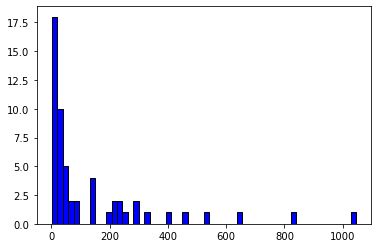

In [57]:
plt.hist(ports['PortArea'], color = 'blue', edgecolor = 'black', bins=ports.shape[0])

5.4. Получите рейтинг регионов по количеству портов в них

In [68]:
ports[['Port', 'Region']].groupby('Region').count().sort_values('Port', ascending=False)

,Port
Region,
Дальний Восток,21
Юг,15
Арктика,13
Запад,7


5.5. Постройте рейтинг морей по количеству портов в них в виде столбиковой диаграммы. Столбики должны быть расположены горизонтально, чтобы удобно читались их подписи, и должны быть расположены по убыванию.

In [97]:
ratingOfSea = ports[['Port', 'Sea']].groupby('Sea').count().sort_values('Port', ascending=True)
ratingOfSea

,Port
Sea,
Восточно-Сибирское,1
Карское,1
Лаптевых,1
Тихий океан,1
Баренцево,3
Берингово,3
Каспийское,3
Белое,4
Азовское,6


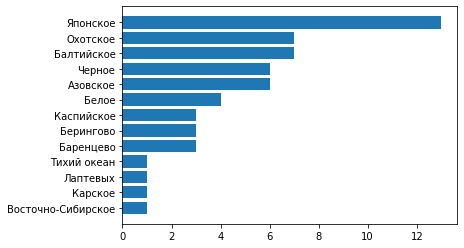

In [98]:
x = ratingOfSea['Port'].tolist()
y = ratingOfSea.index.tolist()
plt.barh(y, x)
plt.show()